This dataset is the appendix of the book "Git Zaman, Gel Zaman" published in 2004. It is a comprehensive work by Cemal Ünlü, sharing the early history of sound recording technologies, recording companies, and artists whose recordings were released by these companies in Turkey.

WEB SCRAPING: This python script (https://github.com/mithatyavuzarslan/turkish78rpm/blob/main/turkish78rpm.py) has been used to create the dataset. Selenium package in Python was used to extract data from a JavaScript table by simulating clicks and collecting categorical data entries page by page into a NumPy array.

______________________________________

In this notebook,(1) Preprocessing has been done mostly for Makam and ReleaseNo entries, (2) Some data visualization has been conducted to explore the distribution of makams performed in recordings by artists and companies using Turkish 78 RPM Recordings dataset.

mithatyavuzarslan@gmail.com

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-catalog-of-turkish-78-rpm-recordings-1905-1965/DF_Turkish78rpmRecords.csv


In [2]:
df_records=pd.read_csv("/kaggle/input/the-catalog-of-turkish-78-rpm-recordings-1905-1965/DF_Turkish78rpmRecords.csv")
df_records.head(10)

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
0,Columbia,12001,Dem-i Visâlde / Yürük Semai,Şehnaz,Darülelhan Heyeti,22010,25 cm.'lik menekşe etiketli plaklar
1,Orfeon,606,Ne Zaman / Şarkı,Hüzzam,Haim Efendi,12520,NaN
2,Orfeon,607,Çeşmi Leyli / Şarkı,Hüzzam,Haim Efendi,12522,NaN
3,Orfeon,607,Neşesi Hatıra / Şarkı,Hüzzam,Haim Efendi,12521,NaN
4,Orfeon,608,Çeşmi Mahmurum / Şarkı,Rast,Haim Efendi,11278,NaN
5,Orfeon,608,Mailem Bir Nazlı / Şarkı,Rast,Haim Efendi,11169,NaN
6,Orfeon,609,Esti Nesimi / Şarkı,Rast,Haim Efendi,12535,NaN
7,Orfeon,609,Zahmı Hicranın / Şarkı,Yegâh,Haim Efendi,12529,NaN
8,Orfeon,610,Aldı Aklım / Şarkı,Yegâh,Haim Efendi,12528,NaN
9,Orfeon,610,Meyle Sevda / Şarkı,Yegâh,Haim Efendi,12527,NaN


# (1) OVERVIEW

In [3]:
df_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16123 entries, 0 to 16122
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Company      16123 non-null  object
 1   CatalogNo    16123 non-null  object
 2   TrackName    16094 non-null  object
 3   Makam        6868 non-null   object
 4   Singer       15676 non-null  object
 5   ReleaseNo    3713 non-null   object
 6   Description  4391 non-null   object
dtypes: object(7)
memory usage: 881.9+ KB


   # Preprocessing for ReleaseNo 

ReleaseNo entries contain numeric, string or NaN values so it needs some processing for cleaning or moving the string values.

In [4]:
df_records['ReleaseNo'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16123 entries, 0 to 16122
Series name: ReleaseNo
Non-Null Count  Dtype 
--------------  ----- 
3713 non-null   object
dtypes: object(1)
memory usage: 126.1+ KB


In [5]:
df_records['ReleaseNo'].unique()

array(['22010', '12520', '12522', ..., 'C.2-12583', 'C.2-12582',
       'C.2-12574'], dtype=object)

In [6]:
# Identify non-numeric values
def is_numeric(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

# Apply the function to the column
non_numeric = df_records[~df_records['ReleaseNo'].apply(is_numeric)]

print("\nNon-Numeric Values in Column:")
non_numeric.tail(50)


Non-Numeric Values in Column:


,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
15030,The Gramophone Company,g1-097,Bilmem ki Sefa Neşe / Şarkı / Keman ile,NaN,Ahmet Bey ve Memduh Efendi,C.12847,NaN
15043,The Gramophone Company,103140 /g1-062,Gönül Sevdi Bir Doktoru,NaN,Gülistan Hanım,K.13613,NaN
15050,The Gramophone Company,g1-123,Gazel,Hicaz,Kemani Ağa ve Hafız Efendi,C.2-12614,NaN
15053,The Gramophone Company,g1-110,Gel Beni Vaslınla / Şarkı,NaN,Kemani Ağa ve Hanende Ali Bey,C.2-12588,NaN
15054,The Gramophone Company,103074 / g1-110,Memo,NaN,Kemani Ağa,Viktorya hanım,C.2-12589
15055,The Gramophone Company,g1-111,Gazel / Kanun ile,Ferahnak,Kemani Ağa,C.2-12590,NaN
15056,The Gramophone Company,g1-111,Canda Hasiyet mi Var / Şarkı,Isfahan,Kemani Ağa ve Civan Efendi,C.2-12591,NaN
15057,The Gramophone Company,102678 / g1-112,Her Dem Sözüm / Şarkı,Bestenigâr,Kemani Ağa ve Civan Efendi,Karakaş Efendi,C.2-12592
15059,The Gramophone Company,g1-112,Atf Etme Sakın / Şarkı / Ud ile,Suzinak,Kemani Ağa,C.2-12593,NaN
15060,The Gramophone Company,g1-113,Hastayi Zevk / Şarkı / Ud ile,Hicazkâr,Kemani Ağa,C.2-12594,NaN


There are also some release number entries containing both numbers and letters. Using a function to distinguish string values (singer names mistakenly entered into the ReleaseNo instead of Description column) from these Mixed entries would be a good idea...

In [7]:
# Function to classify values
def classify_value(value):
    #Checking if the value is NA before conversion
    if pd.isna(value):
        return 'NaN'
    # Ensure value is a string for consistent processing
    value_str = str(value)
    
    # Check if the value can be converted to numeric and is purely numeric
    try:
        if pd.to_numeric(value_str, errors='coerce') == float(value_str):
            return 'Numeric'
    except ValueError:
        pass
    
    # Check if the value contains any numeric characters
    if any(char.isdigit() for char in value_str):
        return 'Mixed'
    return 'String'


# Apply the function to the column
df_sub=df_records[['ReleaseNo','Description']]

df_sub['Categories']=df_sub['ReleaseNo'].apply(classify_value)

df_sub['Categories'].value_counts()



/tmp/ipykernel_18/1072193904.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['Categories']=df_sub['ReleaseNo'].apply(classify_value)


Categories
NaN        12410
Numeric     2829
Mixed        824
String        60
Name: count, dtype: int64

Now we have the String only values as seen below

In [8]:
df_sub[df_sub['Categories']=="String"]

,ReleaseNo,Description,Categories
1070,Rehberi Musıki Heyeti,NaN,String
1071,Rehberi Musıki Heyeti,NaN,String
1072,Tanburi Refik Fersan,NaN,String
1073,Tanburi Refik Fersan,NaN,String
1103,Rehberi Musıki Heyeti,NaN,String
1104,Rehberi Musıki Heyeti,NaN,String
1105,Rehberi Musıki Heyeti,NaN,String
1106,Rehberi Musıki Heyeti,NaN,String
1107,Rehberi Musıki Heyeti,NaN,String
1116,Rehberi Musıki Heyeti,NaN,String


Now it is possible to get the indexes of those entries and swap them with the Desciption on the actual Dataframe (df_records). 

In [9]:
indexes=df_sub[df_sub['Categories']=='String'].index

for index in indexes:
    df_records.loc[index, 'ReleaseNo'], df_records.loc[index, 'Description'] = df_records.loc[index, 'Description'], df_records.loc[index, 'ReleaseNo']

df_records.loc[indexes]


,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
1070,Sahibinin Sesi,AX 0514,Peşrev,Milli Yegâh [Sultaniyegâh],Gramofon Musıki Heyeti,NaN,Rehberi Musıki Heyeti
1071,Sahibinin Sesi,AX 0515,Peşrev,Kürdilihicazkâr,Gramofon Musıki Heyeti,NaN,Rehberi Musıki Heyeti
1072,Sahibinin Sesi,AX 0531,Pur Lamur / Fantezi Şarkı,NaN,Münir Nurettin [Selçuk],NaN,Tanburi Refik Fersan
1073,Sahibinin Sesi,AX 0532,Canlandı Hayalimde,NaN,Münir Nurettin [Selçuk],NaN,Tanburi Refik Fersan
1103,Sahibinin Sesi,AX 0515,Saz Semaisi,Kürdilihicazkâr,Gramofon Musıki Heyeti,NaN,Rehberi Musıki Heyeti
1104,Sahibinin Sesi,AX 0516,Kafkas Havası (Dasnıçors),NaN,Gramofon Musıki Heyeti,NaN,Rehberi Musıki Heyeti
1105,Sahibinin Sesi,AX 0516,Kafkas Oyun Havası,NaN,Gramofon Musıki Heyeti,NaN,Rehberi Musıki Heyeti
1106,Sahibinin Sesi,AX 0517,Peşrev,Segâh,Gramofon Musıki Heyeti,NaN,Rehberi Musıki Heyeti
1107,Sahibinin Sesi,AX 0517,Saz Semaisi,Hüzzam,Gramofon Musıki Heyet,NaN,Rehberi Musıki Heyeti
1116,Sahibinin Sesi,AX 0514,Saz Semaisi,Milli Yegâh [Sultaniyegâh],Gramofon Musıki Heyeti,NaN,Rehberi Musıki Heyeti


The entries in the Description column mostly contain the information about the radius of the vinyl recordings as well as the featuring artist information. 

In [10]:
df_records['Description'].unique()

array(["25 cm.'lik menekşe etiketli plaklar", nan, 'Laz Havaları',
       'Hafız Mahmut Bey', 'Rehberi Musıki Heyeti',
       'Kanuni Artaki [Candan]', 'Tanburi Refik Fersan',
       'Zurnacı Emin Efendi', 'Fikriye Hanım',
       'Madam Viktorya [Victoire]', 'Şevket Bey', 'Hafız Sami Bey',
       'Muhlis Sabahattin Bey', 'Yozgatlı Hafız Süleyman',
       'Riyaseti Cumhur Orkestrası', 'Mahir Bey', 'Bestekar Sedat Bey',
       'Nebile Hanım', "27 cm.'lik plaklar", '27 cm’lik plaklar',
       '27 cm’lik Plaklar', '30 ve 35 cm’lik plaklar',
       '35 cm’lik plaklar', '19 cm’lik küçük plaklar',
       '30 cm’lik plaklar', "25 cm.'lik kahverengi etiketli plaklar",
       "27 cm.'lik kahverengi etiketli plaklar",
       '27 cm’lik kırmızı etiketli plaklar',
       "25 cm.'lik kırmızı etiketli plaklar",
       "30 cm.'lik kırmızı etiketli plaklar",
       "30 cm.'lik kahverengi etiketli plaklar", 'Adanalı Bay Kadri',
       'İzmirli Santuri Recep, Kemani Cemal ve Mustafa',
       'Recep, Cema

   # Preprocessing of Makam 

The entries in the Makam column contains some mistakenly spelled words, singer names and track types.
Entries containing other than actual makam names were identified and replaced or moved manually using their indexes.

In [11]:
pd.set_option("display.max_rows",500)
pd.Series(df_records['Makam'].unique()).sort_values().head(500)

58                           Acem
12                    Acem Aşiran
186                  Acem Kantosu
37                     Acem Kürdi
185                       Anastas
78                           Arak
150                ArazbarBuselik
147                        Aşiran
143                        Bandes
140                    Bestenigar
170              Bestenigar Gazel
18                     Bestenigâr
183              Bestenigâr Kanto
39                         Beyati
42                  Beyati Araban
158                  Beyati Şiraz
153                        Beyatî
94                        Buselik
109                          Daği
157                 Dilkeşhaveran
76                  Dilkeşhâveran
173                        Dugiah
104                         Dügah
59                          Dügâh
11                         Evcara
10                           Eviç
116                       Fantezi
13                      Ferahfeza
26                       Ferahnak
137           

In [12]:
df_records[df_records['Makam']=="Anastas"]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
14812,The Gramophone Company,100500,Suzinak Peşref,Anastas,NaN,NaN,NaN
14813,The Gramophone Company,100501,Nihavent Peşref,Anastas,Nassib Et Karekin,NaN,NaN
14814,The Gramophone Company,100502,Hicaz Peşref,Anastas,Nassib Et Karekin,NaN,NaN
14815,The Gramophone Company,100503,Rast Peşrev (Tateos),Anastas,Nassib Et Karekin,NaN,NaN
14816,The Gramophone Company,100504,Hüseyni Peşrev,Anastas,Nassib Et Karekin,NaN,NaN


In [13]:
df_sub=df_records[df_records['Makam']=="Anastas"]

for index in df_sub.index:
    if pd.isna(df_records.loc[index,'Singer'])==False:
        df_records.loc[index,'Singer']=str(df_records.loc[index,'Singer']) + " /"+ df_records.loc[index,'Makam']
    else:
        df_records.loc[index,'Singer']=df_records.loc[index,'Makam']
        
    df_records.loc[index,'Makam']=df_records.loc[index,'TrackName'].split()[0]

df_records.iloc[14812:14817,:]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
14812,The Gramophone Company,100500,Suzinak Peşref,Suzinak,Anastas,NaN,NaN
14813,The Gramophone Company,100501,Nihavent Peşref,Nihavent,Nassib Et Karekin /Anastas,NaN,NaN
14814,The Gramophone Company,100502,Hicaz Peşref,Hicaz,Nassib Et Karekin /Anastas,NaN,NaN
14815,The Gramophone Company,100503,Rast Peşrev (Tateos),Rast,Nassib Et Karekin /Anastas,NaN,NaN
14816,The Gramophone Company,100504,Hüseyni Peşrev,Hüseyni,Nassib Et Karekin /Anastas,NaN,NaN


In [14]:
df_records[df_records['Makam']=='Bandes']

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
9331,The Gramophone Company,100011,Smyrne Marche - La Musique du Gramophone,Bandes,NaN,NaN,NaN
9332,The Gramophone Company,100013,Vive Constantinople - La Musique du Gramophone,Bandes,NaN,NaN,NaN
9333,The Gramophone Company,100014,Bosphore Marche - La Musique du Gramophone,Bandes,NaN,NaN,NaN
9334,The Gramophone Company,100015,Acem Marche Hymne Persan - La Musique du Gramo...,Bandes,NaN,NaN,NaN
9335,The Gramophone Company,100017,La Musique du Gramophone,Bandes,NaN,NaN,NaN
9336,The Gramophone Company,100018,La Musique du Gramophone,Bandes,NaN,NaN,NaN
9337,The Gramophone Company,100020,Şarkı 1 Nihavend - La Musique du Gramophone,Bandes,NaN,NaN,NaN
9338,The Gramophone Company,100021,Şarkı 2 Hüseyni - La Musique du Gramophone,Bandes,NaN,NaN,NaN
9339,The Gramophone Company,100023,Marche Alpaget - La Musique du Gramophone,Bandes,NaN,NaN,NaN
9340,The Gramophone Company,100024,Musique de la Garde Imperiale,Bandes,NaN,NaN,NaN


In [15]:
mask=df_records[df_records['Makam']=='Bandes']

for index in mask.index:
    df_records.loc[index,'Singer']='Bandes'
    df_records.loc[index,'Makam']=np.nan
df_records[df_records['Singer']=='Bandes']

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
9331,The Gramophone Company,100011,Smyrne Marche - La Musique du Gramophone,NaN,Bandes,NaN,NaN
9332,The Gramophone Company,100013,Vive Constantinople - La Musique du Gramophone,NaN,Bandes,NaN,NaN
9333,The Gramophone Company,100014,Bosphore Marche - La Musique du Gramophone,NaN,Bandes,NaN,NaN
9334,The Gramophone Company,100015,Acem Marche Hymne Persan - La Musique du Gramo...,NaN,Bandes,NaN,NaN
9335,The Gramophone Company,100017,La Musique du Gramophone,NaN,Bandes,NaN,NaN
9336,The Gramophone Company,100018,La Musique du Gramophone,NaN,Bandes,NaN,NaN
9337,The Gramophone Company,100020,Şarkı 1 Nihavend - La Musique du Gramophone,NaN,Bandes,NaN,NaN
9338,The Gramophone Company,100021,Şarkı 2 Hüseyni - La Musique du Gramophone,NaN,Bandes,NaN,NaN
9339,The Gramophone Company,100023,Marche Alpaget - La Musique du Gramophone,NaN,Bandes,NaN,NaN
9340,The Gramophone Company,100024,Musique de la Garde Imperiale,NaN,Bandes,NaN,NaN


In [16]:
df_records[df_records['Makam']=='Bestenigar Gazel']

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
14298,The Gramophone Company,102758,Dil Ateş Dide Ateş Sine Ateş,Bestenigar Gazel,Hafız Sami Efendi - Kemani Memduh,NaN,NaN


In [17]:
df_records.iloc[14298,3]="Bestenigar"
df_records.iloc[14298,2]=df_records.iloc[14298,2] +" /Gazel"
df_records.loc[14298,:].to_frame()

,14298
Company,The Gramophone Company
CatalogNo,102758
TrackName,Dil Ateş Dide Ateş Sine Ateş /Gazel
Makam,Bestenigar
Singer,Hafız Sami Efendi - Kemani Memduh
ReleaseNo,NaN
Description,NaN


In [18]:
df_records[df_records['Makam']=="Bestenigâr Kanto"]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
14663,The Gramophone Company,102189,Sana Ben Canım Dedim,Bestenigâr Kanto,Mme. Viktorya,NaN,NaN


In [19]:
df_records.iloc[14663,2]=df_records.iloc[14663,2]+" /Kanto"
df_records.iloc[14663,3]="Bestenigar"
df_records.iloc[14663,:]

Company             The Gramophone Company
CatalogNo                           102189
TrackName      Sana Ben Canım Dedim /Kanto
Makam                           Bestenigar
Singer                       Mme. Viktorya
ReleaseNo                              NaN
Description                            NaN
Name: 14663, dtype: object

In [20]:
df_records[df_records['Makam']=="Çingene Kantosu"]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
15097,The Gramophone Company,103212,Çayırlarda Yan Atarlar,Çingene Kantosu,Madam Şamram,NaN,NaN


Since this is a common task to be done for moving the entry in Makam to the Track Name, a function would be helpful.

In [21]:
def makam_toTrackName(indexes):
    if isinstance(indexes,list): 
        for index in indexes:
            df_records.iloc[index,2]+=" /"+df_records.iloc[index,3]
            df_records.iloc[index,3]=np.nan
    else:
        df_records.iloc[indexes,2]+=" /"+df_records.iloc[indexes,3]
        df_records.iloc[indexes,3]=np.nan


In [22]:
makam_toTrackName(15097)
df_records.iloc[15097,:]

Company                         The Gramophone Company
CatalogNo                                       103212
TrackName      Çayırlarda Yan Atarlar /Çingene Kantosu
Makam                                              NaN
Singer                                    Madam Şamram
ReleaseNo                                          NaN
Description                                        NaN
Name: 15097, dtype: object

In [23]:
df_records[df_records['Makam']=="Ferahnak Taksim"]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
9321,The Gramophone Company,17948,Kemençe İle,Ferahnak Taksim,Tanburi Cemil Bey,NaN,NaN


In [24]:
df_records.iloc[9321,2]+=" "+df_records.iloc[9321,3]
df_records.iloc[9321,3]="Ferahnak"
df_records.iloc[9321,:]

Company             The Gramophone Company
CatalogNo                            17948
TrackName      Kemençe İle Ferahnak Taksim
Makam                             Ferahnak
Singer                   Tanburi Cemil Bey
ReleaseNo                              NaN
Description                            NaN
Name: 9321, dtype: object

In [25]:
df_records[df_records['Makam']=="Gazel Karcığar"]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
14297,The Gramophone Company,102757,Çözülme Zülfüne Ey Dilruba Dil Bağlayanlardan,Gazel Karcığar,Hafız Sami Efendi - Kemani Memduh,NaN,NaN


In [26]:
df_records.iloc[14297,2]+=" /Gazel"
df_records.iloc[14297,3]="Karcığar"
df_records.iloc[14297,:]

Company                                   The Gramophone Company
CatalogNo                                                 102757
TrackName      Çözülme Zülfüne Ey Dilruba Dil Bağlayanlardan ...
Makam                                                   Karcığar
Singer                         Hafız Sami Efendi - Kemani Memduh
ReleaseNo                                                    NaN
Description                                                  NaN
Name: 14297, dtype: object

In [27]:
df_records[df_records['Makam']=="Guriz Kanto"]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
14337,The Gramophone Company,102733,Karnavaldan Karnavala,Guriz Kanto,Chnork Efendi,NaN,NaN
14338,The Gramophone Company,102734,Kırmızı Gül Takarsın,Guriz Kanto,Chnork Efendi,NaN,NaN
14339,The Gramophone Company,102735,Alçaldık Duvar Üstü,Guriz Kanto,Chnork Efendi,NaN,NaN
14340,The Gramophone Company,102736,Bu Yağmurda Bu Çamurda,Guriz Kanto,Chnork Efendi,NaN,NaN
14342,The Gramophone Company,102737,Arpa Buğdayı Taneler,Guriz Kanto,Chnork Efendi,NaN,NaN
14356,The Gramophone Company,102738,Güvercin Kantosu,Guriz Kanto,Chnork Efendi,NaN,NaN


In [28]:
index_=df_records[df_records['Makam']=="Guriz Kanto"].index
makam_toTrackName(index_)
df_records.iloc[index_]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
14337,The Gramophone Company,102733,Karnavaldan Karnavala /Guriz Kanto,NaN,Chnork Efendi,NaN,NaN
14338,The Gramophone Company,102734,Kırmızı Gül Takarsın /Guriz Kanto,NaN,Chnork Efendi,NaN,NaN
14339,The Gramophone Company,102735,Alçaldık Duvar Üstü /Guriz Kanto,NaN,Chnork Efendi,NaN,NaN
14340,The Gramophone Company,102736,Bu Yağmurda Bu Çamurda /Guriz Kanto,NaN,Chnork Efendi,NaN,NaN
14342,The Gramophone Company,102737,Arpa Buğdayı Taneler /Guriz Kanto,NaN,Chnork Efendi,NaN,NaN
14356,The Gramophone Company,102738,Güvercin Kantosu /Guriz Kanto,NaN,Chnork Efendi,NaN,NaN


In [29]:
df_records[df_records['Makam']=="Hicaz Gazel"]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
14326,The Gramophone Company,102754,Ey Dil Ne Aceb Derde Düşüp Taşla,Hicaz Gazel,Hafız Sami Efendi - Kemani Memduh,NaN,NaN


In [30]:
df_records.iloc[14326,2]+=" /Gazel"
df_records.iloc[14326,3]="Hicaz"
df_records.iloc[14326,:]

Company                         The Gramophone Company
CatalogNo                                       102754
TrackName      Ey Dil Ne Aceb Derde Düşüp Taşla /Gazel
Makam                                            Hicaz
Singer               Hafız Sami Efendi - Kemani Memduh
ReleaseNo                                          NaN
Description                                        NaN
Name: 14326, dtype: object

In [31]:
df_records[df_records['Makam']=="Hicaz Kanto"]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
14320,The Gramophone Company,102780,Na Ümit Vuslatınla,Hicaz Kanto,Hanende İhsan Bey,NaN,NaN
15063,The Gramophone Company,103038,İşte Kalbim Yine Feryat Edecek,Hicaz Kanto,Mme. Viktorya,NaN,NaN


In [32]:
df_records.iloc[14320,2]+=" /Kanto"
df_records.iloc[14320,3]="Hicaz"
df_records.iloc[14320,:]

df_records.iloc[15063,2]+=" /Kanto"
df_records.iloc[15063,3]="Hicaz"
df_records.iloc[15063,:]

df_records[(df_records.index==14320) | (df_records.index==15063)]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
14320,The Gramophone Company,102780,Na Ümit Vuslatınla /Kanto,Hicaz,Hanende İhsan Bey,NaN,NaN
15063,The Gramophone Company,103038,İşte Kalbim Yine Feryat Edecek /Kanto,Hicaz,Mme. Viktorya,NaN,NaN


In [33]:
df_records[df_records['Makam']=="Hüseyni Taksim"]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
9324,The Gramophone Company,17373,Tanbur ile,Hüseyni Taksim,Tanburi Cemil Bey,NaN,NaN


In [34]:
df_records.iloc[9324,2]+=" "+ df_records.iloc[9324,3]
df_records.iloc[9324,3]="Hüseyni"
df_records.iloc[9324,:]

Company           The Gramophone Company
CatalogNo                          17373
TrackName      Tanbur ile Hüseyni Taksim
Makam                            Hüseyni
Singer                 Tanburi Cemil Bey
ReleaseNo                            NaN
Description                          NaN
Name: 9324, dtype: object

In [35]:
df_records[df_records['Makam']=='Hüzzam Kanto']

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
14854,The Gramophone Company,103166,Aman Arkadaşlar,Hüzzam Kanto,Gülfidan Hanım,NaN,NaN


In [36]:
df_records.iloc[14854,2]+=" /Kanto"
df_records.iloc[14854,3]="Hüzzam"
df_records.iloc[14854,:]

Company        The Gramophone Company
CatalogNo                      103166
TrackName      Aman Arkadaşlar /Kanto
Makam                          Hüzzam
Singer                 Gülfidan Hanım
ReleaseNo                         NaN
Description                       NaN
Name: 14854, dtype: object

In [37]:
df_records[df_records['Makam']=='Hüzzam Taksim']

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
9323,The Gramophone Company,17950,Kemençe İle,Hüzzam Taksim,Tanburi Cemil Bey,NaN,NaN


In [38]:
df_records.iloc[9323,2]+=" "+df_records.iloc[9323,3]
df_records.iloc[9323,3]="Hüzzam"
df_records.iloc[9323,:]

Company           The Gramophone Company
CatalogNo                          17950
TrackName      Kemençe İle Hüzzam Taksim
Makam                             Hüzzam
Singer                 Tanburi Cemil Bey
ReleaseNo                            NaN
Description                          NaN
Name: 9323, dtype: object

In [39]:
df_records[df_records['Makam']=="Kanto"]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
14140,The Gramophone Company,102789,Canım Gibi Sevdim,Kanto,Hanende İhsan Bey,NaN,NaN
14143,The Gramophone Company,102793,Evlerinin Önü,Kanto,Chnork Efendi,NaN,NaN
14144,The Gramophone Company,102794,Efeyim Severim,Kanto,Chnork Efendi,NaN,NaN
14145,The Gramophone Company,102795,Gülüm Takmış Takıştırmış,Kanto,Chnork Efendi,NaN,NaN
14146,The Gramophone Company,102796,Halimede Kız Senin Adın Ne,Kanto,Chnork Efendi,NaN,NaN
14147,The Gramophone Company,102797,Kaynana Kaynana,Kanto,Chnork Efendi,NaN,NaN
14148,The Gramophone Company,102798,Kız Pınar Başında,Kanto,Chnork Efendi,NaN,NaN
14168,The Gramophone Company,102787,Debreli Hasan,Kanto,Hanende İhsan Bey,NaN,NaN
14294,The Gramophone Company,102785,Kalbi Sevdazedeler Ah,Kanto,Hanende İhsan Bey,NaN,NaN
14317,The Gramophone Company,102777,Bana Ne Oldu Ben Bilemem,Kanto,Hanende İhsan Bey,NaN,NaN


In [40]:
index_=df_records[df_records['Makam']=="Kanto"].index
makam_toTrackName(index_)
df_records.iloc[index_]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
14140,The Gramophone Company,102789,Canım Gibi Sevdim /Kanto,NaN,Hanende İhsan Bey,NaN,NaN
14143,The Gramophone Company,102793,Evlerinin Önü /Kanto,NaN,Chnork Efendi,NaN,NaN
14144,The Gramophone Company,102794,Efeyim Severim /Kanto,NaN,Chnork Efendi,NaN,NaN
14145,The Gramophone Company,102795,Gülüm Takmış Takıştırmış /Kanto,NaN,Chnork Efendi,NaN,NaN
14146,The Gramophone Company,102796,Halimede Kız Senin Adın Ne /Kanto,NaN,Chnork Efendi,NaN,NaN
14147,The Gramophone Company,102797,Kaynana Kaynana /Kanto,NaN,Chnork Efendi,NaN,NaN
14148,The Gramophone Company,102798,Kız Pınar Başında /Kanto,NaN,Chnork Efendi,NaN,NaN
14168,The Gramophone Company,102787,Debreli Hasan /Kanto,NaN,Hanende İhsan Bey,NaN,NaN
14294,The Gramophone Company,102785,Kalbi Sevdazedeler Ah /Kanto,NaN,Hanende İhsan Bey,NaN,NaN
14317,The Gramophone Company,102777,Bana Ne Oldu Ben Bilemem /Kanto,NaN,Hanende İhsan Bey,NaN,NaN


In [41]:
df_records[df_records['Makam']=="Kanto Rast"]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
14678,The Gramophone Company,103076,Güzellerde Bu Mu Adet,Kanto Rast,Mme. Viktorya,NaN,NaN


In [42]:
df_records.iloc[14678,2]+=" /Kanto"
df_records.iloc[14678,3]="Rast"
df_records.iloc[14678,:]

Company              The Gramophone Company
CatalogNo                            103076
TrackName      Güzellerde Bu Mu Adet /Kanto
Makam                                  Rast
Singer                        Mme. Viktorya
ReleaseNo                               NaN
Description                             NaN
Name: 14678, dtype: object

In [43]:
df_records[df_records['Makam']=="Muhayyer Gazel"]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
14301,The Gramophone Company,102761,Diyemem Sine-i Berrak,Muhayyer Gazel,Hafız Sami Efendi - Kemani Memduh,NaN,NaN


In [44]:
df_records.iloc[14301,2]+=" /Gazel"
df_records.iloc[14301,3]="Muhayyer"
df_records.iloc[14301,:]

Company                   The Gramophone Company
CatalogNo                                 102761
TrackName           Diyemem Sine-i Berrak /Gazel
Makam                                   Muhayyer
Singer         Hafız Sami Efendi - Kemani Memduh
ReleaseNo                                    NaN
Description                                  NaN
Name: 14301, dtype: object

In [45]:
df_records[df_records['Makam']=="Yeni Acem Kantosu"]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
14323,The Gramophone Company,102783,Nane Suyu Nane Şeker,Yeni Acem Kantosu,Hanende İhsan Bey,NaN,NaN


In [46]:
makam_toTrackName(14323)
df_records.iloc[14323,:]

Company                         The Gramophone Company
CatalogNo                                       102783
TrackName      Nane Suyu Nane Şeker /Yeni Acem Kantosu
Makam                                              NaN
Singer                               Hanende İhsan Bey
ReleaseNo                                          NaN
Description                                        NaN
Name: 14323, dtype: object

In [47]:
df_records[df_records['Makam']=="Yeni Efe Kantosu"]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
14141,The Gramophone Company,102790,Bir Nigâh İle Öldürürsün,Yeni Efe Kantosu,Hanende İhsan Bey,NaN,NaN


In [48]:
makam_toTrackName(14141)
df_records.iloc[14141,:]

Company                            The Gramophone Company
CatalogNo                                          102790
TrackName      Bir Nigâh İle Öldürürsün /Yeni Efe Kantosu
Makam                                                 NaN
Singer                                  Hanende İhsan Bey
ReleaseNo                                             NaN
Description                                           NaN
Name: 14141, dtype: object

In [49]:
df_records[df_records['Makam']=="Acem Kantosu"]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
14850,The Gramophone Company,103162,Düştüm Aşkına,Acem Kantosu,Gülfidan Hanım,NaN,NaN


In [50]:
makam_toTrackName(14850)
df_records.iloc[14850,:]

Company             The Gramophone Company
CatalogNo                           103162
TrackName      Düştüm Aşkına /Acem Kantosu
Makam                                  NaN
Singer                      Gülfidan Hanım
ReleaseNo                              NaN
Description                            NaN
Name: 14850, dtype: object

In [51]:
df_records[df_records['Makam']=="Türk Kantosu"]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
14322,The Gramophone Company,102782,Aman Neyleyeyim Bilmiyorum,Türk Kantosu,Hanende İhsan Bey,NaN,NaN


In [52]:
makam_toTrackName(14322)
df_records.iloc[14322,:]

Company                          The Gramophone Company
CatalogNo                                        102782
TrackName      Aman Neyleyeyim Bilmiyorum /Türk Kantosu
Makam                                               NaN
Singer                                Hanende İhsan Bey
ReleaseNo                                           NaN
Description                                         NaN
Name: 14322, dtype: object

In [53]:
df_records[df_records['Makam']=="Türkü"]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
6252,Sahibinin Sesi,AX 1507,Alıverin Bağlamamı Çalayım / Türkü,Türkü,Nebile Hanım,NaN,NaN


In [54]:
df_records.iloc[6252,3]=np.nan
df_records.iloc[6252,:]

Company                            Sahibinin Sesi
CatalogNo                                 AX 1507
TrackName      Alıverin Bağlamamı Çalayım / Türkü
Makam                                         NaN
Singer                               Nebile Hanım
ReleaseNo                                     NaN
Description                                   NaN
Name: 6252, dtype: object

In [55]:
df_records[df_records['Makam']=="Laz Kantosu"]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
14851,The Gramophone Company,103163,Yengenin Kızı,Laz Kantosu,Gülfidan Hanım,NaN,NaN


In [56]:
makam_toTrackName(14851)
df_records.iloc[14851,:]

Company            The Gramophone Company
CatalogNo                          103163
TrackName      Yengenin Kızı /Laz Kantosu
Makam                                 NaN
Singer                     Gülfidan Hanım
ReleaseNo                             NaN
Description                           NaN
Name: 14851, dtype: object

In [57]:
df_records[df_records['Makam']=="Nevakâr"]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
10160,Columbia,12706,Ey Gülbün-i iyş / II. Kısım,Nevakâr,Darülelhan Heyeti,32043,30 cm.'lik menekşe etiketli plaklar
10161,Columbia,12706,Ey Meclis / I. Kısım,Nevakâr,Darülelhan Heyeti,32042,30 cm.'lik menekşe etiketli plaklar
10162,Columbia,12707,Ey Şahid-i Kudsi / III. Kısım,Nevakâr,Darülelhan Heyeti,32044,30 cm.'lik menekşe etiketli plaklar
10163,Columbia,12707,Terennüm / IV. Kısım,Nevakâr,Darülelhan Heyeti,32045,30 cm.'lik menekşe etiketli plaklar


In [58]:
indexes=df_records[df_records['Makam']=="Nevakâr"].index

for index in indexes:
    df_records.loc[index, "TrackName"]+=" /Neva Kâr"
    df_records.loc[index,"Makam"]="Neva"
df_records.loc[indexes]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
10160,Columbia,12706,Ey Gülbün-i iyş / II. Kısım /Neva Kâr,Neva,Darülelhan Heyeti,32043,30 cm.'lik menekşe etiketli plaklar
10161,Columbia,12706,Ey Meclis / I. Kısım /Neva Kâr,Neva,Darülelhan Heyeti,32042,30 cm.'lik menekşe etiketli plaklar
10162,Columbia,12707,Ey Şahid-i Kudsi / III. Kısım /Neva Kâr,Neva,Darülelhan Heyeti,32044,30 cm.'lik menekşe etiketli plaklar
10163,Columbia,12707,Terennüm / IV. Kısım /Neva Kâr,Neva,Darülelhan Heyeti,32045,30 cm.'lik menekşe etiketli plaklar


In [59]:
df_records[df_records['Makam']=="Yekiar Taksim"]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
9329,The Gramophone Company,19394,Tanbur ile,Yekiar Taksim,Tanburi Cemil Bey,NaN,NaN


In [60]:
df_records.iloc[9329,2]+=" Yegah Taksim"
df_records.iloc[9329,3]="Yegah"
df_records.iloc[9329]

Company         The Gramophone Company
CatalogNo                        19394
TrackName      Tanbur ile Yegah Taksim
Makam                            Yegah
Singer               Tanburi Cemil Bey
ReleaseNo                          NaN
Description                        NaN
Name: 9329, dtype: object

In [61]:
df_records[df_records['Makam']=="Uşşak Gazel"]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
14327,The Gramophone Company,102753,Gönül Mağlubu Aşk Olmuş Gezer Divanedir Şimdi,Uşşak Gazel,Hafız Sami Efendi - Kemani Memduh,NaN,NaN


In [62]:
df_records.iloc[14327,2]+=" /Gazel"
df_records.iloc[14327,3]="Uşşak"
df_records.iloc[14327]

Company                                   The Gramophone Company
CatalogNo                                                 102753
TrackName      Gönül Mağlubu Aşk Olmuş Gezer Divanedir Şimdi ...
Makam                                                      Uşşak
Singer                         Hafız Sami Efendi - Kemani Memduh
ReleaseNo                                                    NaN
Description                                                  NaN
Name: 14327, dtype: object

In [63]:
df_records[df_records['Makam']=='Gazel']

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
4787,Sahibinin Sesi,AX 2445,Ne Bahar Alemi Gördüm (Hicaz),Gazel,Nevzat Akay,NaN,NaN
4991,Sahibinin Sesi,AX 2421,Sinemde Açılmış / Rast Neva,Gazel,Müşerref,NaN,NaN
9322,The Gramophone Company,17949,Kemençe İle / Çifte Telli,Gazel,Tanburi Cemil Bey,NaN,NaN
14303,The Gramophone Company,102763,Her Dilber İçin Sinede Bir Yare Mi Olsun,Gazel,Hafız Sami Efendi - Kemani İhsan,NaN,NaN
14670,The Gramophone Company,102197,Keman İle Çifte Telli,Gazel,Hafız Aşir Efendi,NaN,NaN


In [64]:
indexes=[9322,14303,14670]
makam_toTrackName(indexes)
df_records.loc[indexes]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
9322,The Gramophone Company,17949,Kemençe İle / Çifte Telli /Gazel,NaN,Tanburi Cemil Bey,NaN,NaN
14303,The Gramophone Company,102763,Her Dilber İçin Sinede Bir Yare Mi Olsun /Gazel,NaN,Hafız Sami Efendi - Kemani İhsan,NaN,NaN
14670,The Gramophone Company,102197,Keman İle Çifte Telli /Gazel,NaN,Hafız Aşir Efendi,NaN,NaN


In [65]:
df_records.iloc[4787,2]="Ne Bahar Alemi Gördüm /Gazel"
df_records.iloc[4787,3]="Hicaz"
df_records.iloc[4787]

Company                      Sahibinin Sesi
CatalogNo                           AX 2445
TrackName      Ne Bahar Alemi Gördüm /Gazel
Makam                                 Hicaz
Singer                          Nevzat Akay
ReleaseNo                               NaN
Description                             NaN
Name: 4787, dtype: object

In [66]:
df_records.iloc[4991,2]="Sinemde Açılmış /Gazel"
df_records.iloc[4991,3]="Rast Neva"
df_records.iloc[4991]

Company                Sahibinin Sesi
CatalogNo                     AX 2421
TrackName      Sinemde Açılmış /Gazel
Makam                       Rast Neva
Singer                       Müşerref
ReleaseNo                         NaN
Description                       NaN
Name: 4991, dtype: object

In [67]:
df_records[df_records['Makam']=="Gazelli"]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
4846,Sahibinin Sesi,AX 2476,Sarıyerli Güzeller,Gazelli,Mahmut Celalettin,NaN,NaN
4897,Sahibinin Sesi,AX 2470,Acılar,Gazelli,Mualla Gökçay,NaN,NaN
4988,Sahibinin Sesi,AX 2420,Saçları Sarı Gözleri Mavi,Gazelli,Mahmut Celalettin,NaN,NaN


In [68]:
indexes=df_records[df_records['Makam']=="Gazelli"].index
makam_toTrackName(indexes)
df_records.loc[indexes]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
4846,Sahibinin Sesi,AX 2476,Sarıyerli Güzeller /Gazelli,NaN,Mahmut Celalettin,NaN,NaN
4897,Sahibinin Sesi,AX 2470,Acılar /Gazelli,NaN,Mualla Gökçay,NaN,NaN
4988,Sahibinin Sesi,AX 2420,Saçları Sarı Gözleri Mavi /Gazelli,NaN,Mahmut Celalettin,NaN,NaN


In [69]:
df_records[df_records['Makam']=="Fantezi"]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
5080,Sahibinin Sesi,FE 0050,Gönül / Şarkı,Fantezi,Münir Nurettin [Selçuk],NaN,NaN
5092,Sahibinin Sesi,FE 0057,Sen Nerdesin Ey Sevgili / Şarkı,Fantezi,Münir Nurettin [Selçuk],NaN,NaN
5093,Sahibinin Sesi,FE 0057,Seni Bilmem Kimler Okşar / Şarkı,Fantezi,Münir Nurettin [Selçuk],NaN,NaN


In [70]:
indexes=df_records[df_records['Makam']=="Fantezi"].index
makam_toTrackName(indexes)
df_records.loc[indexes]

,Company,CatalogNo,TrackName,Makam,Singer,ReleaseNo,Description
5080,Sahibinin Sesi,FE 0050,Gönül / Şarkı /Fantezi,NaN,Münir Nurettin [Selçuk],NaN,NaN
5092,Sahibinin Sesi,FE 0057,Sen Nerdesin Ey Sevgili / Şarkı /Fantezi,NaN,Münir Nurettin [Selçuk],NaN,NaN
5093,Sahibinin Sesi,FE 0057,Seni Bilmem Kimler Okşar / Şarkı /Fantezi,NaN,Münir Nurettin [Selçuk],NaN,NaN


Standardizing and correcting the spelling of makam names by recoding the values in a dictionary:

In [71]:
recode={
"Arak":"Irak",
"Bestenigâr":"Bestenigar",
"Beyatî":"Beyati",
"Dilkeşhâveran":"Dilkeşhaveran",
"Dugiah":"Dügah",
"Dügâh":"Dügah",
"Ferehfeza":"Ferahfeza",
"Hicaz Yegâh":"Hicaz Yegah",
"Hicazkâr":"Hicazkar",
"Hicez":"Hicaz",
"Hucazkâr":"Hicazkar",
"Hüzam":"Hüzzam",
"Kürdî":"Kürdi",
"Küdilihicazkâr":"Kürdilihicazkar",
"Kürdihicazkâr":"Kürdilihicazkar",
"Kürdilhicazkâr":"Kürdilihicazkar",
"Kürdili":"Kürdilihicazkar",
"Kürdilihicazkâr":"Kürdilihicazkar",
"Milli Yegâh":"Sultaniyegah",
"Milli Yegâh [Sultaniyegâh]":"Sultaniyegah",
"Muhayyer Sünbüli":"Muhayyer Sünbüle",
"Muhayyer Sümbüle":"Muhayyer Sünbüle",
"Muhayyerkürdi":"Muhayyer Kürdi",
"Nema":"Neva",
"Nhavend":"Nihavend",
"Nihavent":"Nihavend",
"Nihâvend":"Nihavend",
"Nişabürek":"Nişaburek",
"Nişâburek":"Nişaburek",
"Sultaniyegâh":"Sultaniyegah",
"Sultâni Yegâh":"Sultaniyegah",
"Tahirbuselik":"Tahir Buselik",
"Yegâh":"Yegah",
"[Beste]Nigar":"Bestenigar",
"[Beste]Nigâr":"Bestenigar",
"hüzzam":"Hüzzam",
"kürdilihicazkâr":"Kürdilihicazkar",
"mahur":"Mahur",
"muhayyer":"Muhayyer",
"müstear":"Müstear",
"Çargâh":"Çargah",
"İsfahan":"Isfahan",
"Şataraban":"Şedaraban",
"Sedaraban":"Şedaraban"
}

df_records['Makam']=df_records['Makam'].replace(recode)

pd.Series(df_records['Makam'].unique()).sort_values().head(500)



56                     Acem
12              Acem Aşiran
37               Acem Kürdi
109          ArazbarBuselik
107                  Aşiran
18               Bestenigar
39                   Beyati
42            Beyati Araban
114            Beyati Şiraz
86                  Buselik
93                     Daği
71            Dilkeşhaveran
57                    Dügah
11                   Evcara
10                     Eviç
13                Ferahfeza
26                 Ferahnak
118         Ferahnak [eviç]
31              Garip Hicaz
106      Garip Hicaz Taksim
81            Garip Hüseyni
75                Gerdaniye
112       Gerdaniye Buselik
74                  Gülizar
4                     Hicaz
70             Hicaz Aşiran
40            Hicaz Hümayun
72               Hicaz Neva
110             Hicaz Yegah
25              Hicazaraban
36                 Hicazkar
100           Hicazkâr Neva
96                    Hisar
61            Hisar Buselik
7                   Hüseyni
108          Hüseyni

# (2) VISUALIZATION / Bar Charts, Stacked Bar Charts and Pie Charts

   # 1. Most Frequently used Makams in the Recordings

Text(0, 0.5, 'Count')

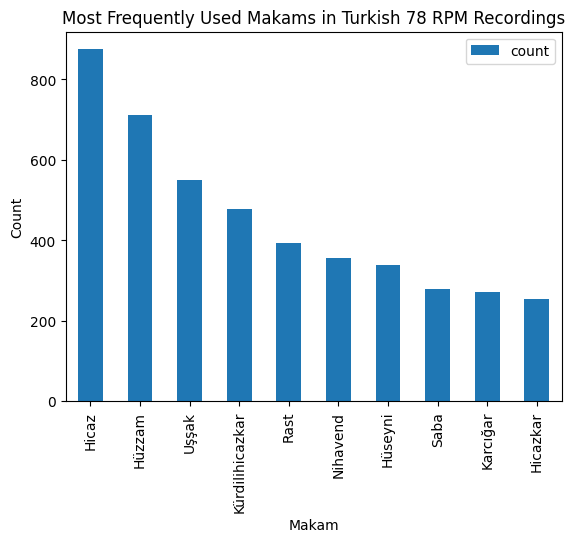

In [72]:
import matplotlib.pyplot as plt

%matplotlib inline

df_records['Makam'].value_counts().head(10).to_frame().plot(kind="bar")
plt.title("Most Frequently Used Makams in Turkish 78 RPM Recordings")
plt.xlabel("Makam")
plt.ylabel("Count")

In [73]:
df_records['Company'].value_counts()

Company
Odeon                             4737
Sahibinin Sesi                    4400
Columbia                          3143
Orfeon                            1701
The Gramophone Company             856
Favorite                           801
Polydor                            220
Grammophon Company (Zonophone)     166
Pathe                               99
Name: count, dtype: int64

   # 2. Record Companies by their Release Counts

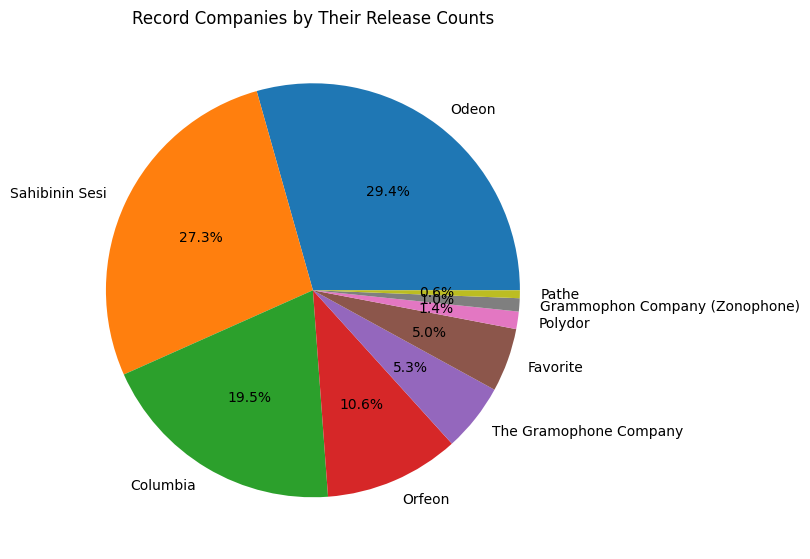

In [74]:
df_sub=df_records['Company'].value_counts()

df_sub.plot.pie(autopct='%1.1f%%',figsize=(8,8))
plt.title("Record Companies by Their Release Counts")
plt.ylabel('')

plt.tight_layout()

   # 3. Most frequently used makams in the recordings by companies.
 It is the stacked version of the first bar chart. 

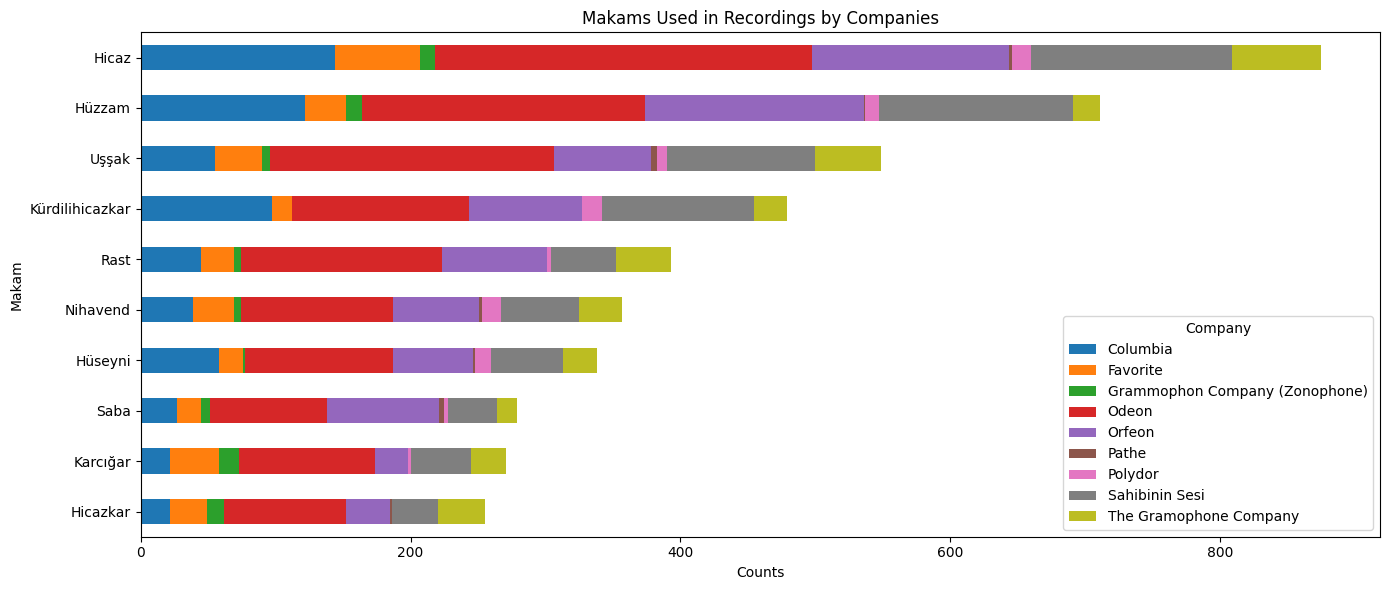

In [75]:
df_subset=df_records[['Company','Makam']]

df_filtered=df_subset[df_subset['Makam'].isin(df_subset['Makam'].value_counts().head(10).index)]

company_counts = df_filtered.groupby(['Makam', 'Company']).size().unstack(fill_value=0)

company_counts['SUM']=company_counts.sum(axis=1)

company_counts = company_counts.sort_values('SUM', ascending=True)

company_counts=company_counts.drop(columns='SUM')

fig,ax=plt.subplots(figsize=(14,6))
company_counts.plot(kind="barh",stacked=True,ax=ax)

plt.title('Makams Used in Recordings by Companies')
plt.xlabel('Counts')

plt.tight_layout()

   # 4. Most Frequently Used Track Types

In [76]:
genres=["Gazel", "Peşrev", "Şarkı", "Kanto", "Türkü", "Saz Semaisi", "Oyun Havası", "Fantezi", "Taksim",
       "Tango","Marş","Çiftetelli","Operet","Fokstrot","Zeybek","Vals","Rumba","Koşma","Ninni"]
genre_counts=[]
for genre in genres:
    if (genre=="Saz Semaisi"):
        dict_genre= {genre: df_records[(df_records['TrackName'].isna()==False) & (df_records['TrackName'].str.contains("Semai",case=False)) & (df_records['TrackName'].str.contains("Saz",case=False))].shape[0]}
        genre_counts.append(dict_genre)
    elif (genre=="Zeybek"):
        dict_genre={genre: df_records[(df_records['TrackName'].isna()==False) & (df_records['TrackName'].str.contains("Zeybek",case=False)) | (df_records['TrackName'].str.contains("Zeybeği",case=False))].shape[0]}
        genre_counts.append(dict_genre)
    else:
        dict_genre= {genre: df_records[(df_records['TrackName'].isna()==False) & (df_records['TrackName'].str.contains(genre,case=False))].shape[0]}
        genre_counts.append(dict_genre)

df_genres = pd.DataFrame(genre_counts).stack().reset_index()
df_genres.columns = ['Index', 'Genre', 'Count']
df_genres = df_genres.drop(columns='Index')

df_genres.sort_values(by="Count",ascending=False)

,Genre,Count
2,Şarkı,4332.0
0,Gazel,1302.0
3,Kanto,934.0
4,Türkü,682.0
8,Taksim,569.0
9,Tango,244.0
10,Marş,227.0
1,Peşrev,222.0
11,Çiftetelli,197.0
14,Zeybek,146.0


Text(0.5, 1.0, 'Most Frequently Used Track Types')

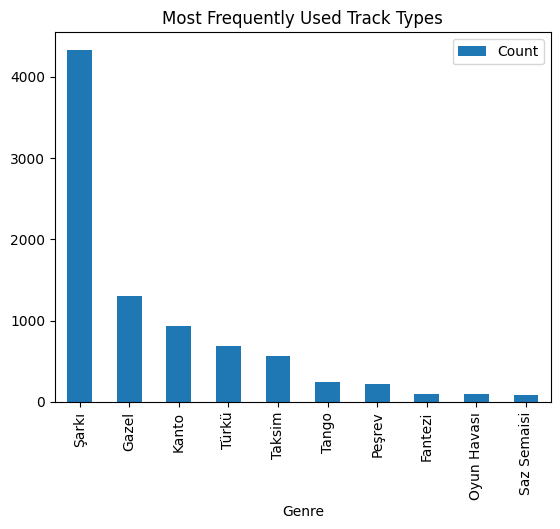

In [77]:
df_genres.head(10).sort_values(by="Count",ascending=False).plot(kind="bar",x="Genre",y="Count")
plt.title("Most Frequently Used Track Types")

   # 5. Makams of Songs,Taksims and Gazels

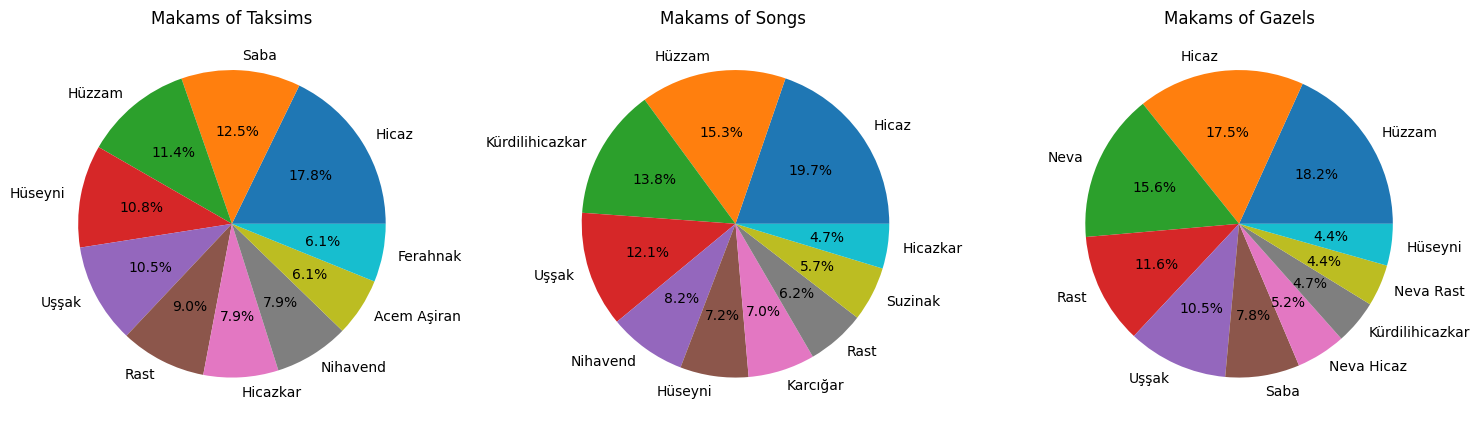

In [78]:
import matplotlib.pyplot as plt

# Define the layout for 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Pie chart for "Taksimler hangi makamda"
df_subset = df_records[(df_records['TrackName'].isna() == False) & (df_records['TrackName'].str.contains("Taksim", case=False))]
df_subset['Makam'].value_counts().head(10).plot(kind="pie", ax=axes[0], legend=False, ylabel="", autopct='%1.1f%%', title='Makams of Taksims')

# Pie chart for "Şarkılar hangi makamda"
df_subset = df_records[(df_records['TrackName'].isna() == False) & (df_records['TrackName'].str.contains("Şarkı", case=False))]
df_subset['Makam'].value_counts().head(10).plot(kind="pie", ax=axes[1], legend=False, ylabel="", autopct='%1.1f%%', title='Makams of Songs ')

# Pie chart for "Gazeller hangi makamda"
df_subset = df_records[(df_records['TrackName'].isna() == False) & (df_records['TrackName'].str.contains("Gazel", case=False))]
df_subset['Makam'].value_counts().head(10).plot(kind="pie", ax=axes[2], legend=False, ylabel="", autopct='%1.1f%%', title='Makams of Gazels')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


   # 6. Ten Common makams found in songs,taksims and gazels

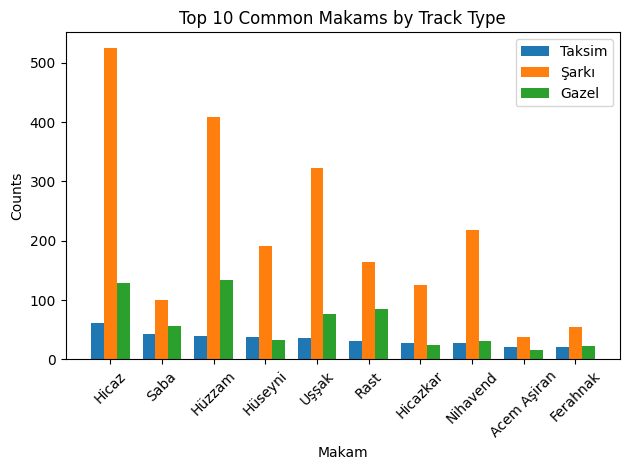

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for each category
df_taksim = df_records[(df_records['TrackName'].isna() == False) & (df_records['TrackName'].str.contains("Taksim", case=False))]
df_sarki = df_records[(df_records['TrackName'].isna() == False) & (df_records['TrackName'].str.contains("Şarkı", case=False))]
df_gazel = df_records[(df_records['TrackName'].isna() == False) & (df_records['TrackName'].str.contains("Gazel", case=False))]

# Get the Makam counts for each category
taksim_counts = df_taksim['Makam'].value_counts()
sarki_counts = df_sarki['Makam'].value_counts()
gazel_counts = df_gazel['Makam'].value_counts()

# Find the intersection of Makam used by all three categories
common_makams = taksim_counts.index.intersection(sarki_counts.index).intersection(gazel_counts.index)

# Filter the counts to include only these common Makams
taksim_counts = taksim_counts[common_makams]
sarki_counts = sarki_counts[common_makams]
gazel_counts = gazel_counts[common_makams]

# Combine the data into a single DataFrame
combined_df = pd.DataFrame({'Taksim': taksim_counts, 'Şarkı': sarki_counts, 'Gazel': gazel_counts}).fillna(0)

# Select the first ten common Makams
combined_df = combined_df.head(10)

# Define bar positions
bar_width = 0.25
index = np.arange(len(combined_df))

# Create the grouped bar chart
plt.bar(index, combined_df['Taksim'], bar_width, label='Taksim')
plt.bar(index + bar_width, combined_df['Şarkı'], bar_width, label='Şarkı')
plt.bar(index + 2 * bar_width, combined_df['Gazel'], bar_width, label='Gazel')

# Add labels and title
plt.xlabel('Makam')
plt.ylabel('Counts')
plt.title('Top 10 Common Makams by Track Type')
plt.xticks(index + bar_width, combined_df.index, rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [80]:
common_makams

Index(['Hicaz', 'Saba', 'Hüzzam', 'Hüseyni', 'Uşşak', 'Rast', 'Hicazkar',
       'Nihavend', 'Acem Aşiran', 'Ferahnak', 'Kürdilihicazkar', 'Bestenigar',
       'Suzinak', 'Segâh', 'Karcığar', 'Isfahan', 'Mahur', 'Neva', 'Şedaraban',
       'Yegah', 'Şehnaz', 'Sultaniyegah', 'Ferahfeza', 'Garip Hicaz',
       'Suzidil', 'Eviç', 'Evcara', 'Muhayyer', 'Şevkefza', 'Müstear',
       'Beyati', 'Acem Kürdi', 'Tahir Buselik', 'Neva Hicaz', 'Nişaburek',
       'Muhayyer Kürdi', 'Nikriz', 'Neveser', 'Irak', 'Rast Neva', 'Dügah'],
      dtype='object', name='Makam')

   # 7. Makam counts of Artists by Companies

In [81]:
df_records["Singer"].value_counts().head(20).to_frame()

,count
Singer,
Hafız Âşir Efendi,587
Hafız Yaşar [Okur],493
Hanende İbrahim Efendi,320
Münir Nurettin [Selçuk],275
Hanende İbrahim Efendi ve Rıza Bey,249
Darülelhan Heyeti,244
Haim Efendi,220
Hafız Burhan [Sesyılmaz],217
Karakaş Efendi,211


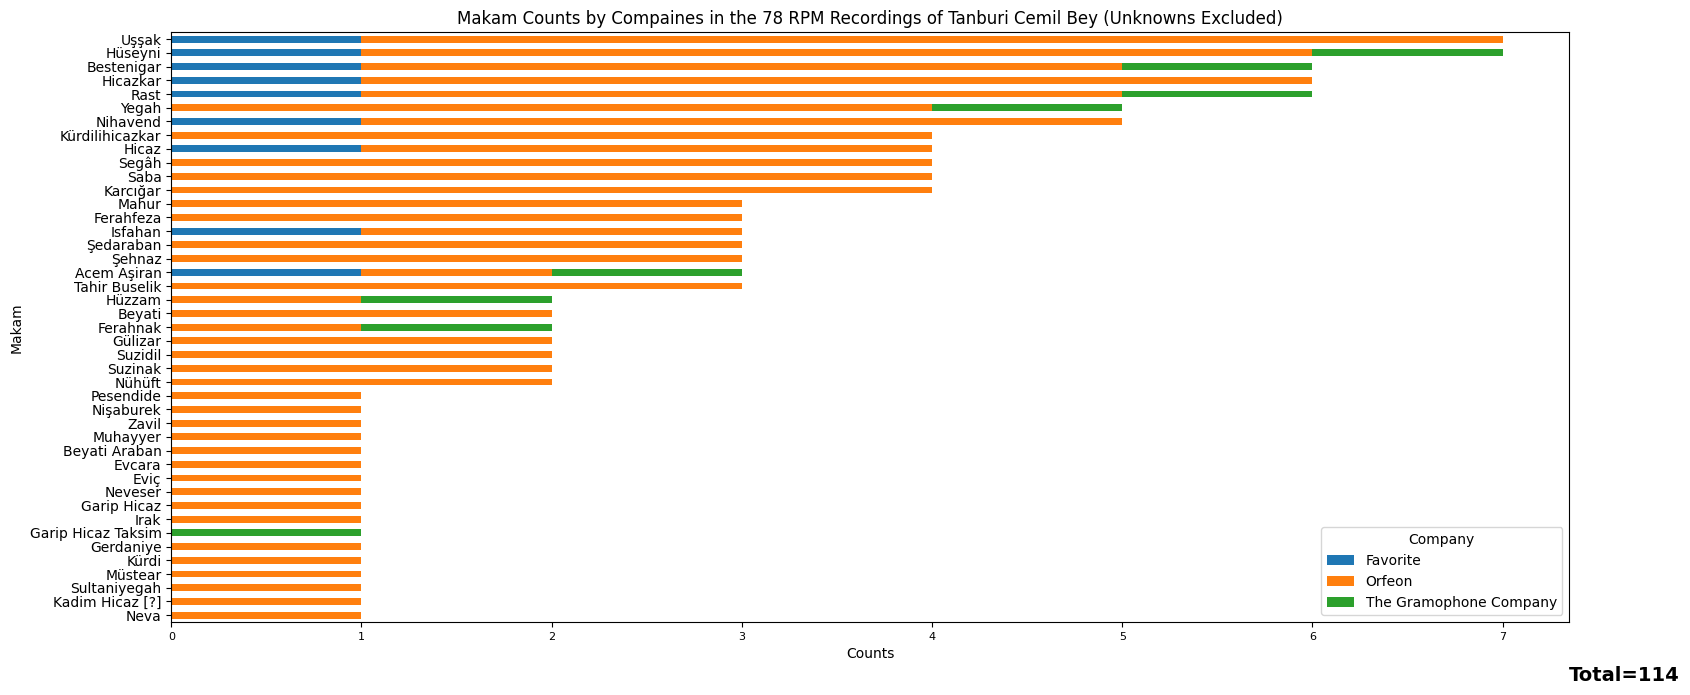

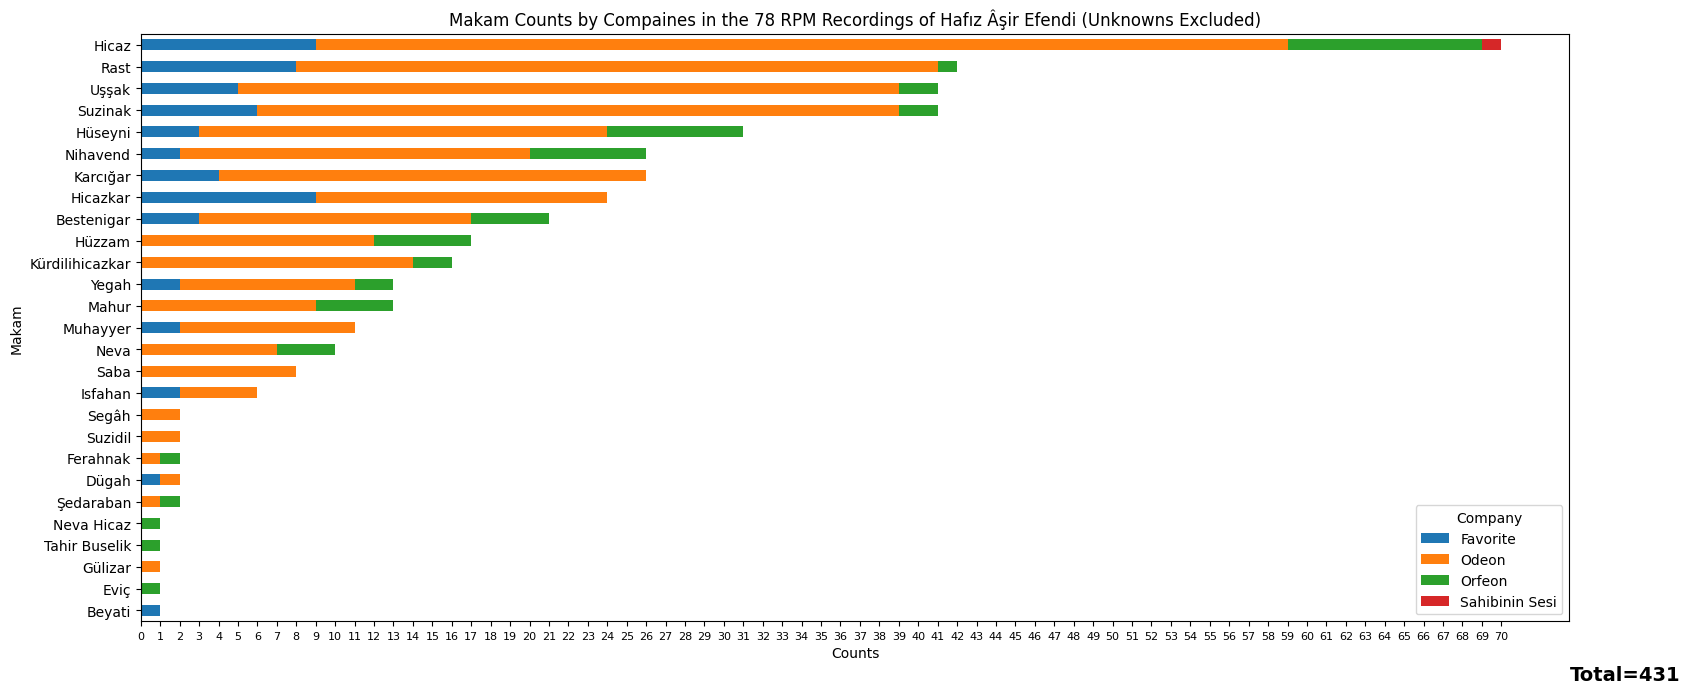

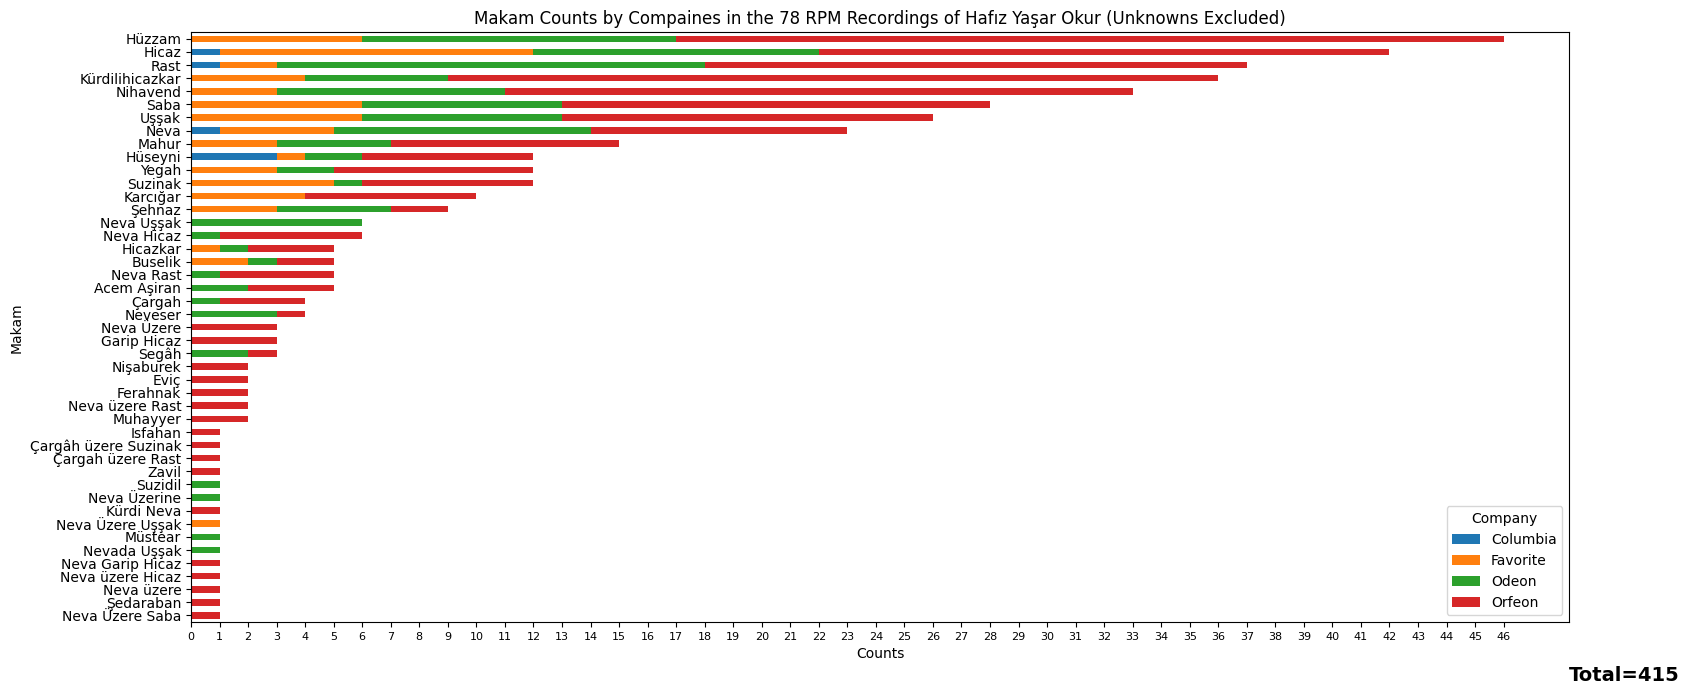

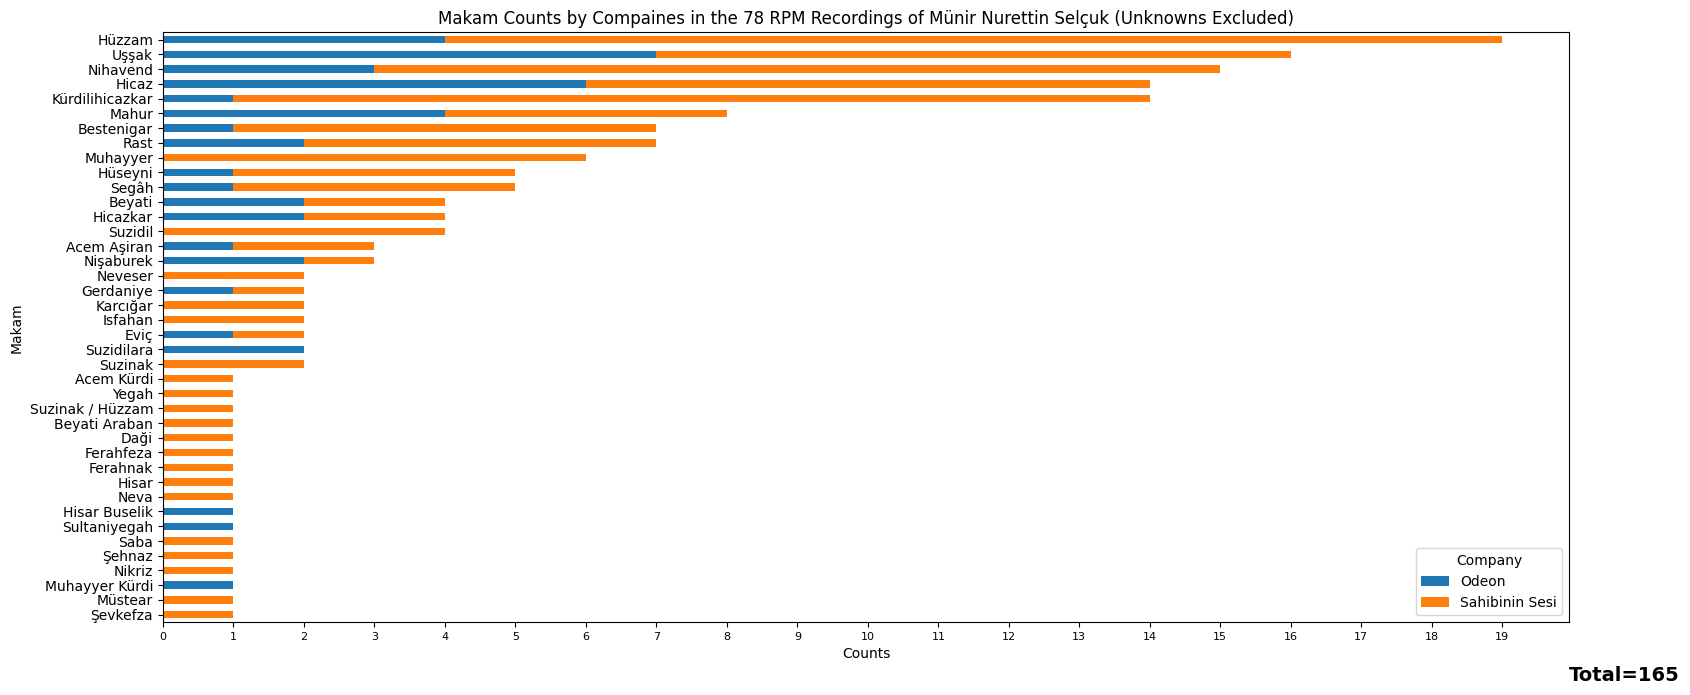

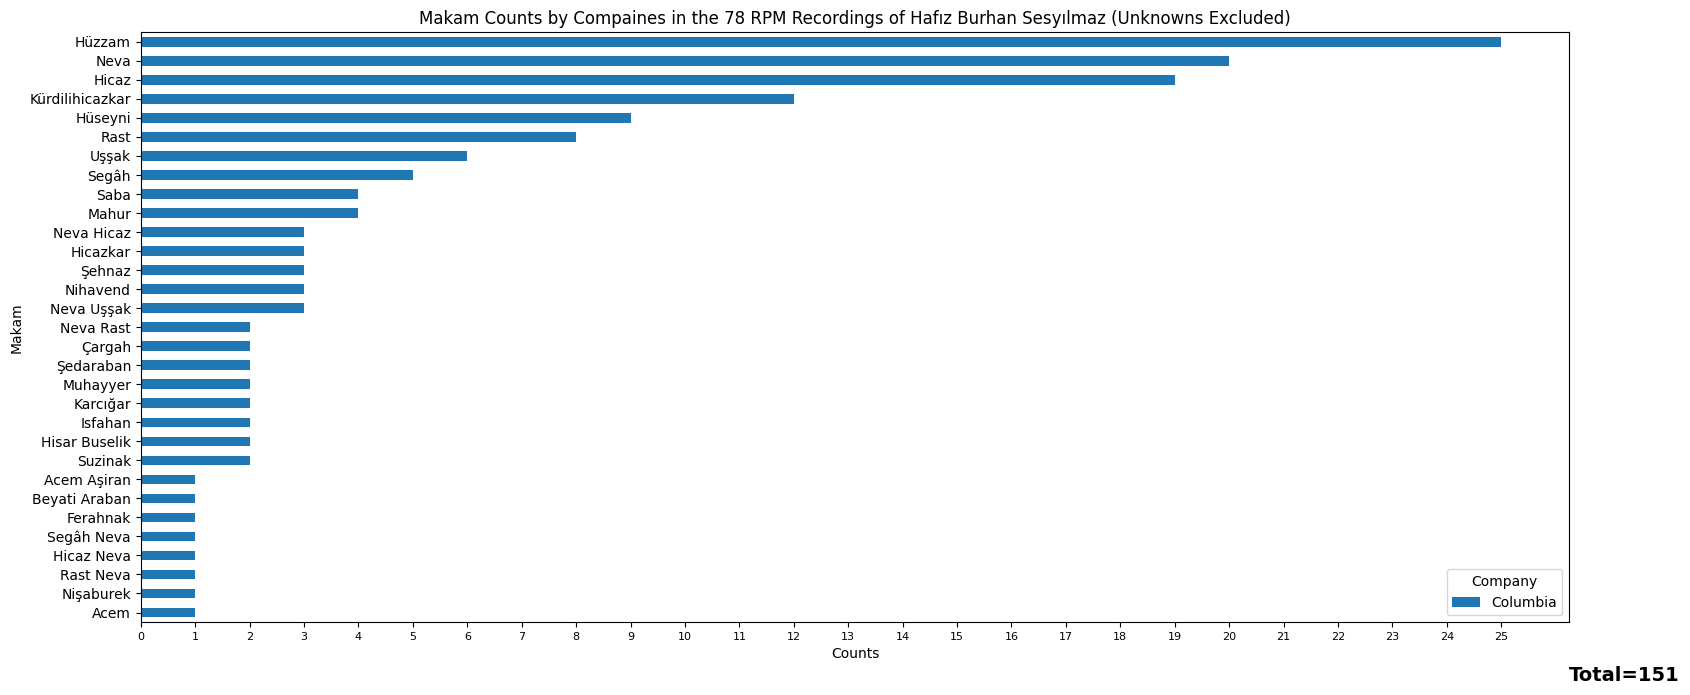

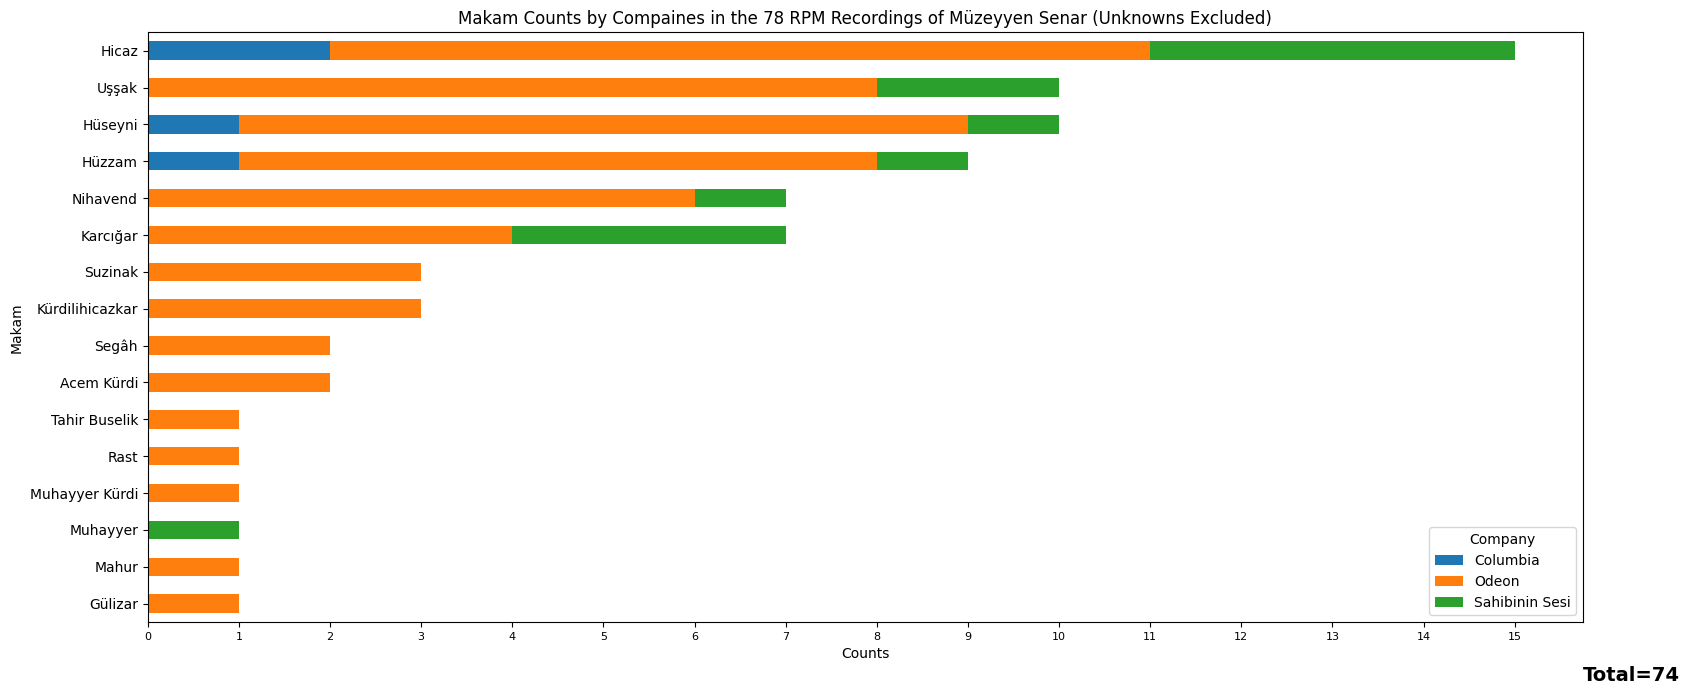

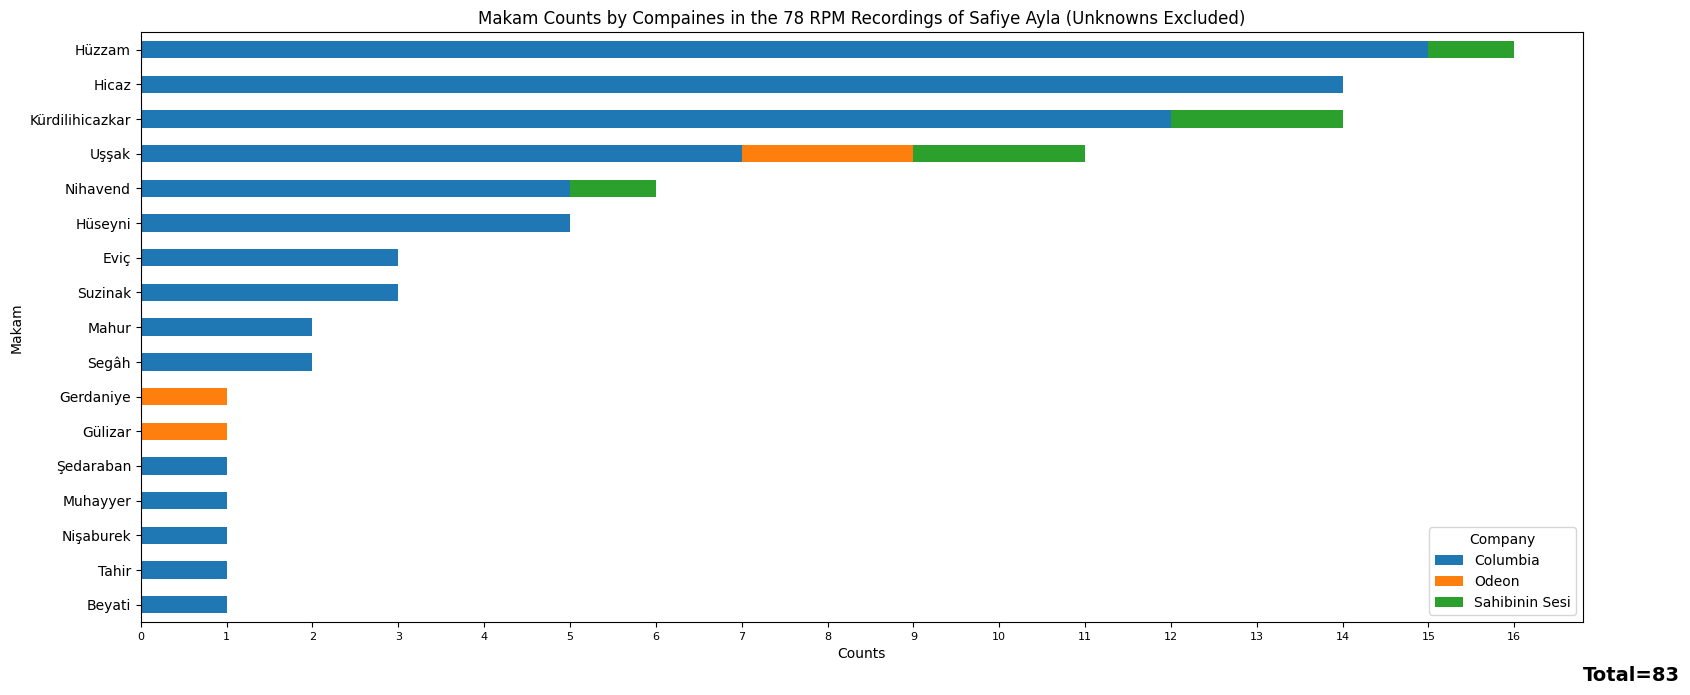

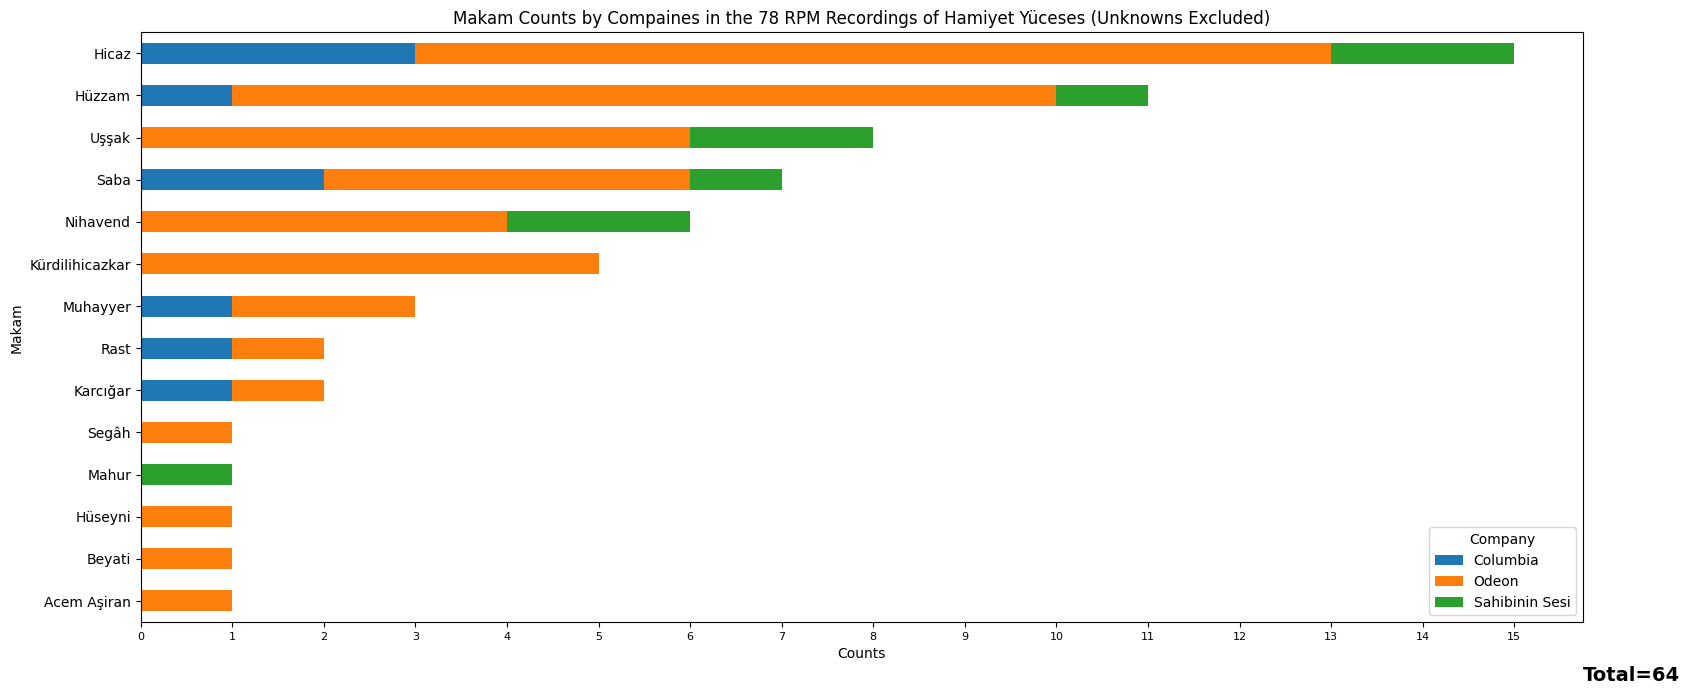

In [82]:
singers=["Tanburi Cemil Bey","Hafız Âşir Efendi","Hafız Yaşar [Okur]","Münir Nurettin [Selçuk]","Hafız Burhan [Sesyılmaz]","Müzeyyen Senar","Safiye Ayla","Hamiyet Yüceses"]

for singer in singers:
    df_sub=df_records[df_records['Singer']==singer]
    df_sub=df_sub[['Singer','Makam','Company']]
    
    makam_counts=df_sub.groupby(['Makam','Company']).size().unstack(fill_value=0)
    makam_counts['TOTAL']=makam_counts.sum(axis=1)
    makam_counts=makam_counts.sort_values('TOTAL',ascending=True)

    range_max=makam_counts['TOTAL'].max()
    makam_counts=makam_counts.drop(columns='TOTAL')
    
    fig,ax=plt.subplots(figsize=(17,7))
    makam_counts.plot(kind="barh",stacked=True,ax=ax)
    
    plt.xticks(range(range_max+1),fontsize=8)
    plt.title(f'Makam Counts by Compaines in the 78 RPM Recordings of {singer.replace("[","").replace("]","")} (Unknowns Excluded)')
    plt.text(x=1, y=-0.1, s= "Total="+ str(makam_counts.sum().sum()), fontsize=14, fontweight='bold', transform=plt.gca().transAxes)
    plt.xlabel('Counts')
    plt.tight_layout()

   # 8. Record counts for those without Makam Info

Text(0.5, 1.0, 'Artists’ Record Counts Without Makam Information, Grouped by Company')

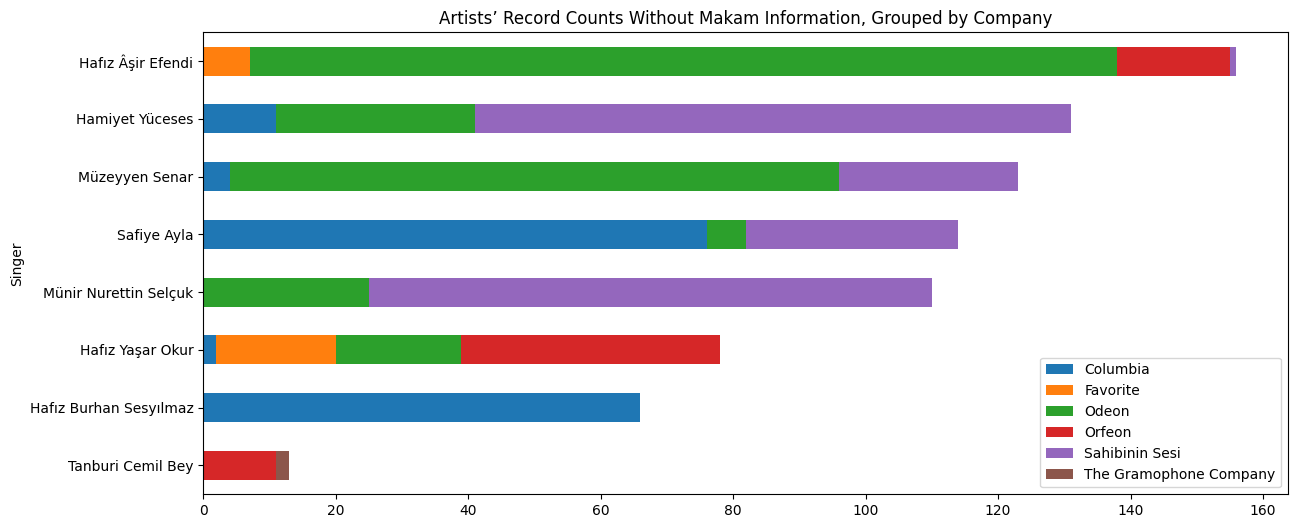

In [83]:
df_sub=df_records[df_records['Makam'].isna()]

singers=["Tanburi Cemil Bey","Hafız Âşir Efendi","Hafız Yaşar [Okur]","Münir Nurettin [Selçuk]","Hafız Burhan [Sesyılmaz]","Müzeyyen Senar","Safiye Ayla","Hamiyet Yüceses"]
df_sub=df_sub[df_sub["Singer"].isin(singers)]
df_sub=df_sub[['Company','Singer']]
df_sub['Singer']=df_sub['Singer'].str.replace("[","").str.replace("]","")
singer_counts=df_sub.groupby(['Singer','Company']).size().unstack(fill_value=0)
singer_counts['TOTAL']=singer_counts.sum(axis=1)
singer_counts=singer_counts.sort_values('TOTAL',ascending=True)
singer_counts=singer_counts.drop(columns='TOTAL')
singer_counts.plot(kind="barh",stacked=True,figsize=(14,6))
plt.legend()
plt.title("Artists’ Record Counts Without Makam Information, Grouped by Company")


   # Wordcloud of Trackname values

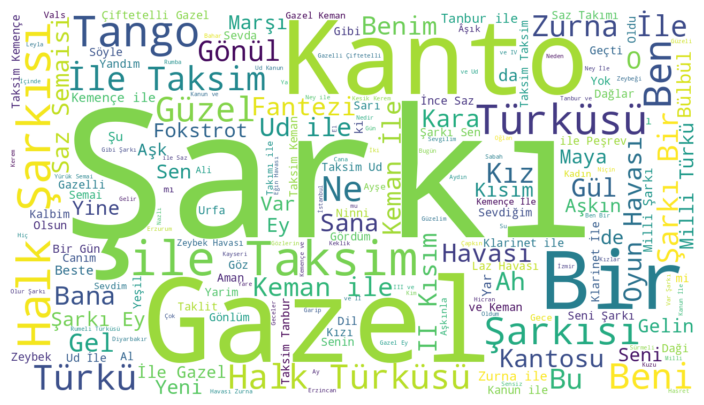

In [84]:
from wordcloud import WordCloud

items=[str(item) if pd.notnull(item) else '' for item in df_records['TrackName']]

text=' '.join(items)

wordcloud=WordCloud(width=1280, height=720,background_color="White").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()